# Samuel Settie Final Notebook
data set : https://data.wprdc.org/dataset/allegheny-county-fast-food

The dataset keeps track of all the fast food restaurants without an alcohol permit within Allegheny County. This includes chain restaurants, as well as locally owned restaurants. It was last updated in 2016, and contains over 800 entries.

First, I'll import the necessary libraries, load the dataset, and display the first few rows of the dataset.

In [9]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = "https://data.wprdc.org/dataset/c34f9a82-779c-4f90-9e1c-b3b5025b0db5/resource/3c530161-2976-41ae-a0f0-7d3e74835049/download/fastfoodalleghenycountyupdatexy2.csv"
fast_food_data = pd.read_csv(url)

# Display the first few rows of the dataset to understand the format
fast_food_data.head()

,Name,Legal Name,Start Date,Street Number,Street Name,ZIP Code,Lat,Lon,Category
0,Adrian's Pizza,NaN,11/7/2014,605,Thompson Run Rd,15237,40.539465,-79.990764,Take Out
1,Adrian's Pizza Express,Rock Enterprises Inc,4/22/2004,7824,Perry Hwy,15237,40.551219,-80.037362,Take Out
2,Allegheny Sandwich Shop,NaN,2/24/1997,414,Grant St,15219,40.438110,-79.996860,NO Dollar Menu
3,Allegheny Sandwich Shoppe #3,Allegheny Sandwich Shoppe Inc,11/9/2001,440,Ross St,15219,40.438514,-79.995330,NO Dollar Menu
4,Amili's Pizzeria,NaN,2/26/1999,1021,Brownsville Rd,15210,40.406082,-79.991863,Take Out


The sub-metric I will use to determine the best neighborhood in Pittsburgh is the total count of fast food restuarants for each given neighborhood. I chose this metric for the following reasons.

1. A high number of fast food restaurants can indicate good accessibility to food different options within the neighborhood. This can be particularly important for individuals who rely on convenience (college students) or have limited mobility.
2. A high concentration of fast food restaurants likely represent a thriving local economy and a high number of potential job opportunities in the area.
3. An increase in fast food restaurants could be a sign of ongoing urban development, which might attract investment and lead to improvements in infrastructure and amenities.
4. Provides a reflection of the cultural diversity of the neighborhood; a higher count of fast food restaurants could indicate a culturally diverse community.

The following code calculates the total number of fast food restaurants for each given zip code, sorts the zip codes based on the total number of restaurants in descending order, displays the top 10 zip codes with the highest number of restaurants, and visualizes them in a table.


     ZIP Code  total_fast_food
209     15146               51
697     15222               46
689     15237               44
523     15213               38
644     15205               36
163     15219               27
623     15236               25
343     15235               22
194     15102               21
830     15217               20


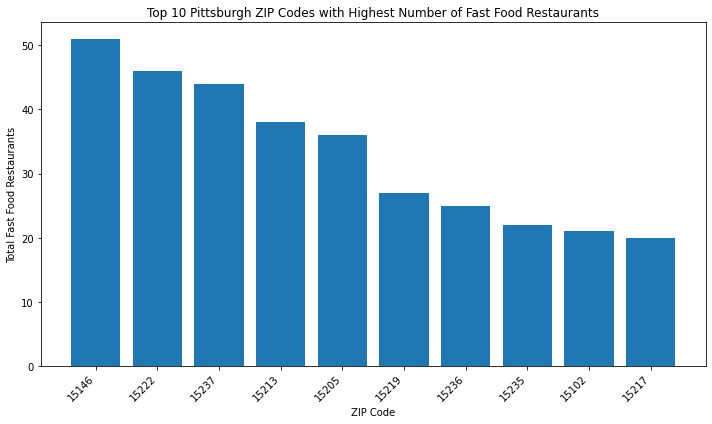

In [10]:
# Calculate the total number of fast food restaurants in each ZIP code
fast_food_data['total_fast_food'] = fast_food_data.groupby('ZIP Code')['Category'].transform('count')

# Sort ZIP codes by the total number of fast food restaurants
sorted_data = fast_food_data.sort_values(by='total_fast_food', ascending=False)

# Display the top ZIP codes with the highest number of fast food restaurants
top_zipcodes = sorted_data[['ZIP Code', 'total_fast_food']].drop_duplicates().head(10)
print(top_zipcodes)

# Visualize the top ZIP codes with the highest number of fast food restaurants
plt.figure(figsize=(10, 6))
plt.bar(top_zipcodes['ZIP Code'].astype(str), top_zipcodes['total_fast_food'])
plt.xlabel('ZIP Code')
plt.ylabel('Total Fast Food Restaurants')
plt.title('Top 10 Pittsburgh ZIP Codes with Highest Number of Fast Food Restaurants')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Since the dataset only holds the restuarants zip code, and not the actual neighborhoods, I needed to manually convert the zipcodes to their corrseponding neighborhoods.

The following code segment manually assigns neighborhoods to each ZIP code and creates a DataFrame named top_neighborhoods that contains two columns: "Neighborhood" and "Total Fast Food Restaurants". The "Neighborhood" column holds the names of the neighborhoods, and the "Total Fast Food Restaurants" column contains the total count of fast food restaurants in each neighborhood.

After creating and printing the DataFrame, the code creates a visualization of same information using a bar chart, where the x-axis represents the neighborhoods and the y-axis represents the total number of fast food restaurants.

                      Neighborhood  Total Fast Food Restaurants
209                    Monroeville                           51
697       Downtown, Strip District                           46
689                       McKnight                           44
523                        Oakland                           38
644              Robinson, Crafton                           36
163  Station Square, Hill District                           27
623                 Pleasant Hills                           25
343                     Penn Hills                           22
194                    Bethel Park                           21
830                  Squirrel Hill                           20


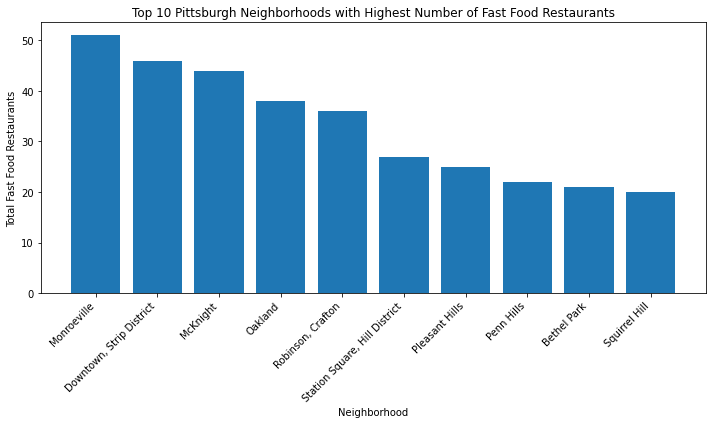

In [14]:
neighborhoods = [
    'Monroeville', 
    'Downtown, Strip District', 
    'McKnight', 
    'Oakland', 
    'Robinson, Crafton', 
    'Station Square, Hill District', 
    'Pleasant Hills', 
    'Penn Hills', 
    'Bethel Park', 
    'Squirrel Hill'
]

# Create a DataFrame for the top neighborhoods with the highest number of fast food restaurants
top_neighborhoods = pd.DataFrame({
    'Neighborhood': neighborhoods,
    'Total Fast Food Restaurants': top_zipcodes['total_fast_food']
})

# Display the top neighborhoods with the highest number of fast food restaurants
print(top_neighborhoods)

# Visualize the top neighborhoods with the highest number of fast food restaurants
plt.figure(figsize=(10, 6))
plt.bar(top_neighborhoods['Neighborhood'], top_neighborhoods['Total Fast Food Restaurants'])
plt.xlabel('Neighborhood')
plt.ylabel('Total Fast Food Restaurants')
plt.title('Top 10 Pittsburgh Neighborhoods with Highest Number of Fast Food Restaurants')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The results displayed in the table and the bar chart represent the top 10 Pittsburgh neighborhoods with the highest number of fast food restaurants. This information can be valuable for potential residents, business owners, and policymakers interested in understanding food options and economic dynamics within Pittsburgh neighborhoods. Overall, the results suggest that *most* areas with a high number of fast food restaurants have a higher population density, and more commercial activity. 

To conclude, according to the sub-metric of total fast food restaurants, the best neighborhood in Pittsburgh is Monroeville, with Downtown/Strip Disctrict and McKnight following close behind. 